In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MEAN = 0
STD = 0.01

def RL_exec(max_iter, arms_num, task_num, epsilon):
    model_init(max_iter,arms_num,task_num)
    run(max_iter,arms_num,task_num,epsilon)

In [3]:
def model_init(max_iter, arms_num, task_num):
    global Q,N,R
    Q = np.zeros(arms_num)
    N = np.zeros(arms_num)
    R= np.random.randint(1,20,size=(10,1))
    
    
def bandit(action):
    global R
    if np.random.randint(low=0,high=20)>10:
        reward=0
    else:
        reward=R[action]
    return reward

In [4]:
def epsilon_greedy(arms_num,epsilon):
    global Q, N
    action = 0
    if 1000*epsilon>=np.random.randn()%1000:
        action = int(np.random.randn())%arms_num
    else:
        action = np.argmax(Q)
    return action

In [5]:
def run(max_iter, arms_num, task_num, epsilon):
    global Q, N ,R
    tot_N = []
    tot_R = []
    step_size=1
    for i in range(max_iter):
        for j in range(task_num):
            action = epsilon_greedy(arms_num,epsilon)
            reward = bandit(action)
            Q[action]+=step_size*(reward-Q[action])
            N[action]+=1
            step_size=1/np.sum(N)
        tot_N.append(N.sum()/task_num)
        tot_R.append(np.mean(Q))
    print(R.transpose())
    print(Q.transpose())
    plt.plot(tot_N,tot_R)

[[ 5 10 13  9  2 12 17 13 15 19]]
[2.73371890e+00 3.59022735e+00 6.18844195e-01 3.89444458e-02
 4.73245782e-05 0.00000000e+00 1.74745432e-02 4.40510876e-02
 8.41088770e-01 1.04464139e+01]


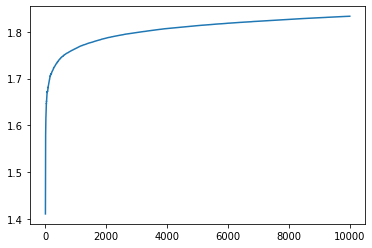

In [6]:
RL_exec(10000,10,500,0.1)